In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('D:/ds/Titanic_Data.csv')

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

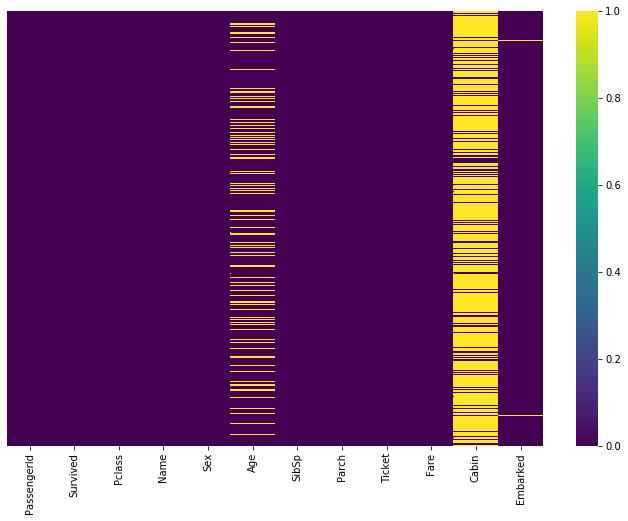

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap='viridis')

In [6]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

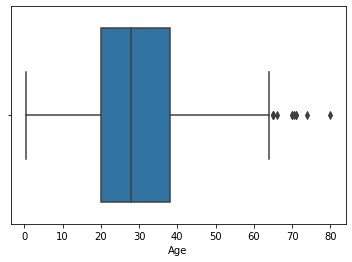

In [8]:
sns.boxplot(titanic_df['Age'])

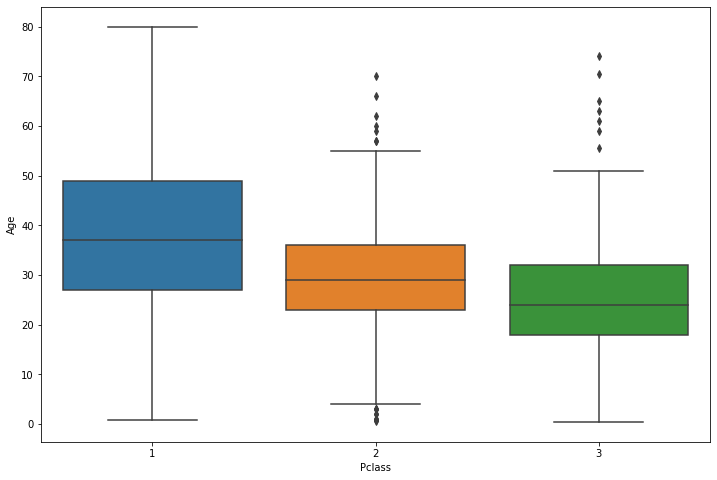

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(titanic_df['Pclass'],titanic_df['Age'])


In [11]:
#defining a function for imputing
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
    return Age
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute,axis = 1)
#axis = 1 is for taking columns
        

In [12]:
titanic_df.dropna(inplace=True)

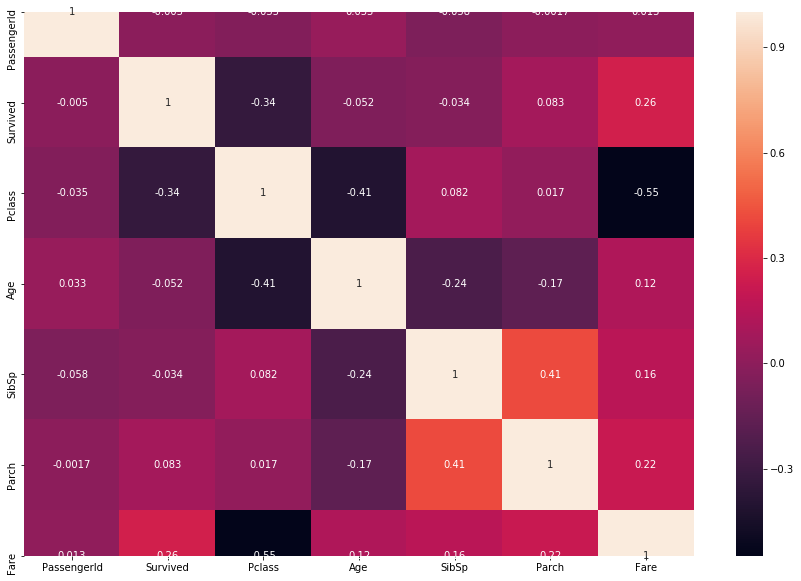

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(titanic_df.corr(),annot=True)

# Preprocessing
drop passenger id,name,ticket

In [14]:
gender = pd.get_dummies(titanic_df['Sex'])
embarked = pd.get_dummies(titanic_df['Embarked'])

In [15]:
titanic_df_new = pd.concat([titanic_df,gender,embarked],axis = 1)

In [16]:
titanic_df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,1,0,0


In [17]:
titanic_df_new.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis = 1, inplace=True)

In [18]:
titanic_df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [19]:
titanic_df_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

In [20]:
X = titanic_df_new.drop(['Survived'],axis=1)
Y = titanic_df_new['Survived']

In [21]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [28]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(C=1e7,max_iter=1e5,solver='liblinear')
logit_reg.fit(train_x,train_y)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='liblinear',
                   tol=0.0001, verbose=0, warm_start=False)

In [29]:
logit_reg.score(test_x,test_y)

0.8033707865168539

In [34]:
yhat = logit_reg.predict(test_x)

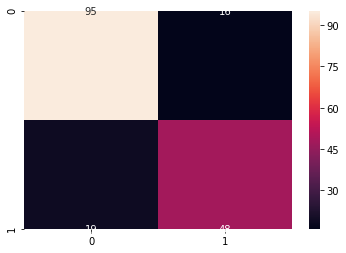

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_y,yhat),annot=True)
#confusion matrix is for finding the false positives,true positive,false negatives and true negatives

In [37]:
logit_reg.predict([[3,25,0,0,73.000,0,1,0,0,1]]) #jack

array([0], dtype=int64)

In [39]:
logit_reg.predict([[1,25,0,0,73.000,1,0,0,0,1]]) #rose

array([1], dtype=int64)